In [4]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# variant 27 (2)
# f(x) = (x + 1) * cos (x)
# [-1, 1]

In [6]:
# parameters that can be changed

n = 200            # number of points

In [7]:
# function declaration

a = -1
b = 1

x = symbols('x')
f_x = cos(x)
f_x

cos(x)

In [8]:
# value of the integral for checking

answer = integrate(f_x, (x, a, b))
answer

2*sin(1)

In [9]:
# rect method in function
# return - counted value of the integral

def rect_method(f_x, a, b, n):
    h = (b - a) / n
    coords = [ a + h * i for i in range(n) ]
    integral = 0
    for i in range(len(coords) - 1):
        integral += h * f_x.subs(x, coords[i])
    return integral

In [10]:
abs(rect_method(f_x, a, b, n) - answer.n())

0.00550092314560313

In [11]:
# trapezoidal method in function
# return - counted value of the integral

def trapezoidal_method(f_x, a, b, n):
    h = (b - a) / n
    coords = [ a + h * i for i in range(n) ]
    integral = 0
    for i in range(len(coords)):
        coeff = 1
        if i == 0 or i == len(coords) - 1:
            coeff = 1/2
        integral += h * coeff * f_x.subs(x, coords[i])
    return integral

In [12]:
abs(trapezoidal_method(f_x, a, b, n) - answer.n())

0.00545898537203593

In [13]:
# simpson method in function
# return - counted value of the integral

def simpson_method(f_x, a, b, n):
    h = (b - a) / (n)
    coords = [ a + h * i for i in range(n) ]
    integral = 0
    for i in range(len(coords)):
        integral += h / 6 * (f_x.subs(x, coords[i]) + 4 * f_x.subs(x, coords[i] + h/2) + f_x.subs(x, coords[i] + h))
    return integral

In [14]:
abs(simpson_method(f_x, a, b, n) - answer.n())

5.84399195702190e-12

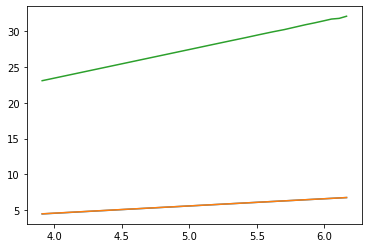

In [16]:
# plotting

h_s = []
difference_simpson = []
difference_rect = []
difference_trapezoidal = []
for n_i in range(100, 1000, 50):
    h = (b - a) / (n_i)
    h_s.append(abs(log(h)))
    difference_simpson.append(abs(log(abs(simpson_method(f_x, a, b, n_i) - answer.n()))))
    difference_rect.append(abs(log(abs(rect_method(f_x, a, b, n_i) - answer.n()))))
    difference_trapezoidal.append(abs(log(abs(trapezoidal_method(f_x, a, b, n_i) - answer.n()))))
plt.plot(h_s, difference_rect)
plt.plot(h_s, difference_trapezoidal)
plt.plot(h_s, difference_simpson)